In [1]:
# Heat Equation 
# from https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/partial_differential_equations_two_examples.ipynb
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import numpy.linalg as linalg
from IPython.display import HTML

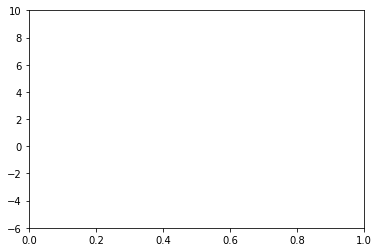

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-6, 10))
line, = ax.plot([], [], lw=1)

In [3]:
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [4]:
# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x, u[i,:])
    return line,

In [5]:
alpha = 0.005
Nx = 100
dx = 1.0/Nx
x = np.linspace(0, 1, Nx + 1)

Nt = 1000
dt = 10.0/Nt

# Boundary condition
ua = 2.0
ub = 10.0

C = alpha*dt/dx**2
print("C = ", C)

### Construct solution matrix
A = np.zeros([Nx + 1, Nx + 1])

# Diagonals equal 1+2C
for i in range(Nx + 1):
    A[i, i] = 1 + 2*C

# Off-diagonals equal -C
    if i > 0:
        A[i, i - 1] = -C
    if i < Nx:
        A[i, i + 1] = -C

# Construct boundary condition matrix b where only first and last term are non-zero:
b = np.zeros(Nx + 1)
b[0] = C*ua
b[-1] = C*ub

C =  0.5

('C = ', 0.5)


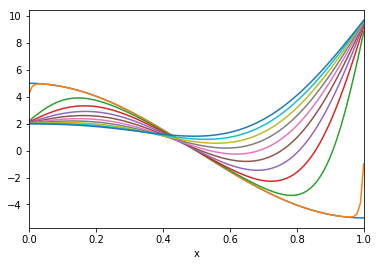

In [6]:
u = np.zeros([Nt+1, Nx+1])
u[0,:] = 5*np.cos(np.pi*x)

plt.figure()
plt.plot(x, u[0])

for n in range(Nt):
    u[n+1] = linalg.solve(A, b+u[n])
    
    if n%100 == 0:
        plt.plot(x, u[n+1])
plt.xlabel('x')
plt.xlim([0, 1])
plt.show()

In [7]:
# Set new figure parameters
newparams = {'axes.labelsize': 11, 'axes.linewidth': 0.5, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (3, 2),
             'ytick.labelsize': 5, 'xtick.labelsize': 5,}
plt.rcParams.update(newparams);

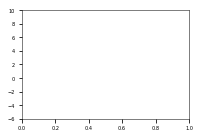

In [8]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-6, 10))
line, = ax.plot([], [], lw=1)

In [9]:
# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=20, blit=True)

In [10]:
plt.close(anim._fig)

# Call our new function to display the animation
# needed ffmpeg: conda install -c menpo ffmpeg
HTML(anim.to_html5_video())